In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
'''
DATA_PATH = "/content/drive/Shareddrives/DL_Project/Data"
IMAGES_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_original"
CROPPED_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_cropped"
AUDIO_PATH = "/content/drive/Shareddrives/DL_Project/Data/genres_original"
CREATED_PATH = "/content/drive/Shareddrives/DL_Project/Data/created_images"
'''

'\nDATA_PATH = "/content/drive/Shareddrives/DL_Project/Data"\nIMAGES_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_original"\nCROPPED_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_cropped"\nAUDIO_PATH = "/content/drive/Shareddrives/DL_Project/Data/genres_original"\nCREATED_PATH = "/content/drive/Shareddrives/DL_Project/Data/created_images"\n'

## My local path

In [5]:
DATA_PATH = "./Data"
IMAGES_PATH = "./Data/images_original"

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [7]:
### YOUR CODE HERE
df_three = pd.read_csv(f"{DATA_PATH}/features_3_sec.csv")
df_thirty =  pd.read_csv(f"{DATA_PATH}/features_30_sec.csv")

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

In [8]:
'''
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to convert audio files to spectrograms
def audio_to_spectrogram(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each audio file in the input folder
    for audio_file in os.listdir(input_folder):
        # Check if the file is an audio file
        if audio_file.endswith(".wav"):
            # Load audio file
            audio_path = os.path.join(input_folder, audio_file)
            y, sr = librosa.load(audio_path)

            # Generate spectrogram
            plt.figure(figsize=(10, 4))
            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
            librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
            plt.axis('off')  # Turn off axis labels
            plt.gca().set_position([0, 0, 1, 1])  # Remove surrounding whitespace
            plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
            plt.margins(0, 0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())

            # Save spectrogram
            spectrogram_path = os.path.join(output_folder, os.path.splitext(audio_file)[0] + '.png')
            plt.savefig(spectrogram_path)
            plt.close()

            print(f"Spectrogram saved: {spectrogram_path}")

# Paths to input and output folders
genre_names = ["hiphop", "metal", "reggae", "blues", "disco", "jazz", "pop", "classical", "rock", "country"]

input_folders = [os.path.join(AUDIO_PATH, genre) for genre in genre_names]
output_folders = [os.path.join(CREATED_PATH, genre) for genre in genre_names]


# Convert audio files to spectrograms for each pair of input and output folders
for input_folder, output_folder in zip(input_folders, output_folders):
    audio_to_spectrogram(input_folder, output_folder)
    '''

'\nimport os\nimport librosa\nimport librosa.display\nimport matplotlib.pyplot as plt\n\n# Function to convert audio files to spectrograms\ndef audio_to_spectrogram(input_folder, output_folder):\n    # Create output folder if it doesn\'t exist\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n\n    # Iterate through each audio file in the input folder\n    for audio_file in os.listdir(input_folder):\n        # Check if the file is an audio file\n        if audio_file.endswith(".wav"):\n            # Load audio file\n            audio_path = os.path.join(input_folder, audio_file)\n            y, sr = librosa.load(audio_path)\n\n            # Generate spectrogram\n            plt.figure(figsize=(10, 4))\n            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)\n            librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis=\'mel\', fmax=8000, x_axis=\'time\')\n            plt.axis(\'off\')  # Turn off axis labels\n     

### Three second audio clips

In [9]:
df_three

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [10]:
df_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

### Thirty Second Audio Clips

In [11]:
df_thirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [12]:
df_thirty.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


### Loading Images as training data

Images are read into RGBA, where A is transparency. As seen below, all transparency values are 255. We can get rid of them.

In [14]:
import os
import numpy as np
from PIL import Image

# Define genres
genres = df_three.label.unique()

# Function to load images from directory
def load_images(root_folder, genres):
    images = []
    y = []
    for genre in genres:
      img_temp, y_temp = load_images_from_genre(root_folder, genre)
      images.extend(img_temp)
      y.extend(y_temp)
    return np.array(images), np.array(y)

def load_images_from_genre(root_folder, genre):
    images = []
    folder = root_folder+f"/{genre}"
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))

        # Get rid of 'A' in 'RGBA'
        img = img.convert("RGB")
        if img is not None:
            img = np.array(img)
            images.append(img)
    images = np.stack(images)
    return np.array(images), np.array([genre]*images.shape[0]).reshape(-1, 1)

# Load images that we created

X, y = load_images(IMAGES_PATH, genres)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


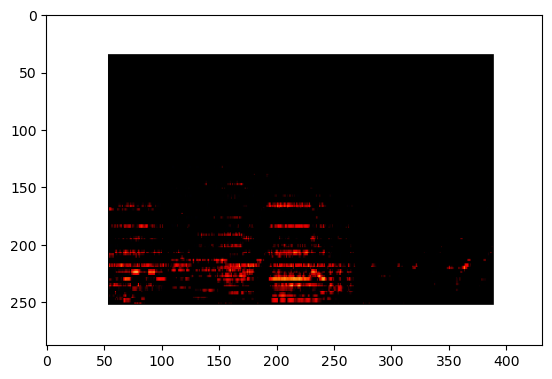

In [35]:
plt.imshow(X[102])

### One Hot Encode, Normalize, Flatten

In [16]:
image_dimensions = X.shape[1:3]
image_dimensions

(288, 432)

In [17]:
X = ((X / 255.0)*2.0)-1
X.shape

(999, 288, 432, 3)

Making sure images are normalized to [-1.0, 1.0]

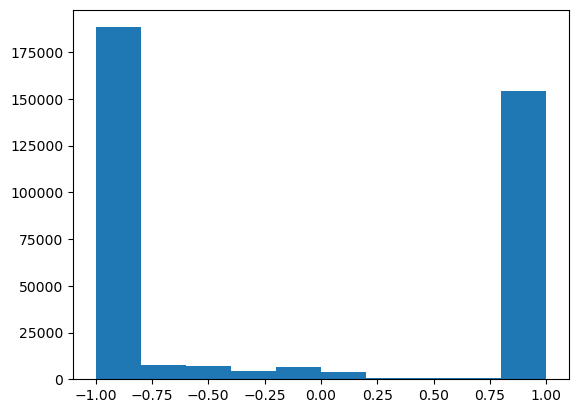

In [18]:
plt.hist(X[0].flatten())
plt.show()

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Use stratify to evenly split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (799, 288, 432, 3)
Shape of X_test: (200, 288, 432, 3)
Shape of y_train: (799, 1)
Shape of y_test: (200, 1)


In [21]:
# Checking for ~ evenly distributed test, training classes
print(np.unique(y_train, return_counts=True)[1])
print(np.unique(y_test, return_counts=True)[1])

[80 80 80 80 80 79 80 80 80 80]
[20 20 20 20 20 20 20 20 20 20]


In [22]:
genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

# Implementing the CNN

In [143]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import Lambda
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

transform = transforms.Compose([transforms.ToTensor()])


#X_train = torch.tensor(X_train)
#X_test = torch.tensor(X_test)

# Define custom dataset in order to have a dataset + dataloader
class CustomDataset(Dataset):
    def __init__(self, x_train, y_train, transform=None, target_transform=None):
        self.x_train = x_train
        self.y_train = y_train
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image = self.x_train[idx]
        label = self.y_train[idx]

        if self.transform:
            image = self.transform(image)
        
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

# Converting data to tensors
X_train = torch.tensor(X_train)
X_train = X_train.permute(0,3,1,2)
X_train = X_train.type(torch.float32)

X_test = torch.tensor(X_test)
X_test = X_test.permute(0,3,1,2)
X_test = X_test.type(torch.float32)

# Encoding labels
label_encoder = LabelEncoder()
label_encoder.fit(genres)

BATCH_SIZE = 50

target_transform = Lambda(lambda y: label_encoder.transform(y))

train_dataset = CustomDataset(X_train, y_train, transform=None, target_transform=target_transform)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = CustomDataset(X_test, y_test, transform=None,  target_transform=target_transform)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

From tutorial https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [175]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, image_input_shape):
        super().__init__()
        if image_input_shape:
            self.row_length, self.col_length = image_input_shape

        self.convrelu = lambda in_channels, out_channels, kernel_size, stride: nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 
                  kernel_size, stride, padding="same"),
        nn.ReLU()
        )
    
        self.pool = nn.MaxPool2d(2, 2)
        self.fc_layers = nn.Sequential(

        )
        
        self.network = nn.Sequential(
            self.convrelu(3, 12, 3, 1),
            self.pool,
            
            self.convrelu(12, 24, 3, 1),
            self.pool,

            self.convrelu(24, 48, 3, 1),
            self.pool,

            nn.Flatten(),
            nn.Linear(1944*48, 1000),
            nn.ReLU(),
            nn.Linear(1000, 250),
            nn.ReLU(),
            nn.Linear(250, 10),

        )

        

    def forward(self, x):
        return self.network(x)

net = Net(image_dimensions)


In [179]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
criterion()

In [200]:
def train_model(net, epochs, train_dataloader, criterion, optimizer, val_dataloader=None):
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(train_dataloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            labels = labels.reshape(-1)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2 == 0:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2:.3f}')
                running_loss = 0.0

    print('Finished Training')
train_model(net, 10, train_dataloader, criterion, optimizer)

[1,     1] loss: 0.749
[1,     3] loss: 1.901
[1,     5] loss: 2.060
[1,     7] loss: 1.927
[1,     9] loss: 1.810
[1,    11] loss: 1.822
[1,    13] loss: 1.725
[1,    15] loss: 1.939
[1,    17] loss: 1.755
[1,    19] loss: 1.795
[1,    21] loss: 1.896
[1,    23] loss: 1.872
[1,    25] loss: 1.742
[1,    27] loss: 1.929
[1,    29] loss: 1.731
[1,    31] loss: 1.967
[1,    33] loss: 1.966
[1,    35] loss: 1.618
[1,    37] loss: 1.569
[1,    39] loss: 1.551
[1,    41] loss: 2.169
[1,    43] loss: 1.858
[1,    45] loss: 1.527
[1,    47] loss: 1.803
[1,    49] loss: 1.642
[1,    51] loss: 1.949
[1,    53] loss: 2.001
[1,    55] loss: 1.916
[1,    57] loss: 1.551
[1,    59] loss: 2.346
[1,    61] loss: 1.980
[1,    63] loss: 1.971
[1,    65] loss: 1.935
[1,    67] loss: 1.804
[1,    69] loss: 1.840
[1,    71] loss: 1.903
[1,    73] loss: 1.719
[1,    75] loss: 2.103
[1,    77] loss: 1.916
[1,    79] loss: 1.937
[2,     1] loss: 0.875
[2,     3] loss: 2.105
[2,     5] loss: 1.706
[2,     7] 

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

with torch.no_grad():
    net.eval()
    y_hat = net(X_test)
    y_hat = torch.argmax(y_hat, dim=1)
    y_test = label_encoder.transform(y_test)
    print(accuracy_score(y_test, y_hat))



ValueError: y contains previously unseen labels: 1

In [ ]:
y_hat.numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])